In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [100]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd
import math
#Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

**1. Loading data**

In [ ]:
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.325369,7.374907,0.0,6.0,13.0,19.0,200.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


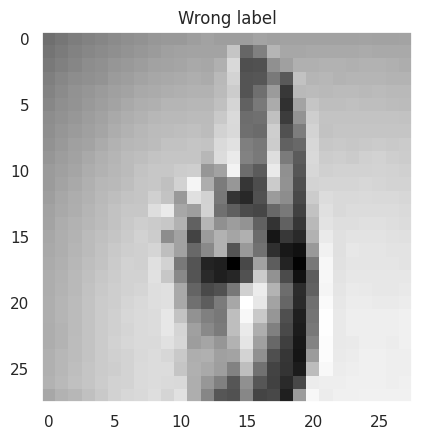

In [ ]:
wrong_lable = df_train[df_train.label == 200]
plt.title(f"Wrong label")
plt.imshow(wrong_lable.iloc[:,1:].to_numpy(dtype=np.float64).reshape(28,28), cmap='gray')
plt.grid(False)
None

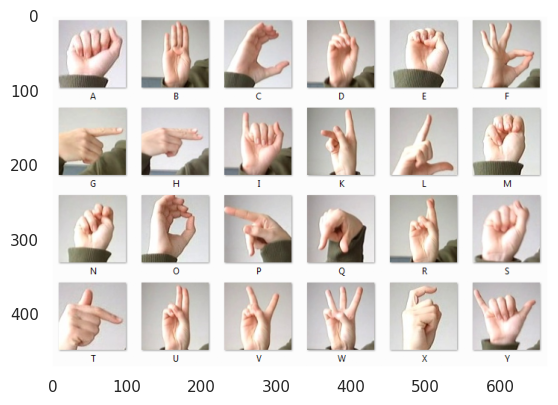

In [ ]:
img = plt.imread('amer_sign2.png')
plt.imshow(img)
plt.grid(False);

In [ ]:
import string
classes = (list(string.ascii_uppercase))
classes = np.array(classes)

In [ ]:
df_train.loc[df_train['label'] == 200, 'label'] = int(np.where(classes == 'U')[0])

In [ ]:
len(df_train['label'].unique())    # 24 lables, so set 24 for the last layer.

24

In [ ]:
df_train.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 164.2 MB


In [ ]:
X_set = df_train.iloc[:,1:].to_numpy(dtype=np.float64)
y_set = df_train.iloc[:,0].to_numpy()
X_test = df_test.iloc[:,1:].to_numpy(dtype=np.float64)
y_test = df_test.iloc[:,0].to_numpy()

X_train = X_set.reshape(len(X_set), 28,28)/255.0
X_test = X_test.reshape(len(X_test), 28,28)/255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X_train, y_set, test_size=0.2, random_state=42)

In [ ]:
print(f'Training data: {X_train.shape},{y_train.shape}')
print(f'Validation data: {X_val.shape},{y_val.shape}')
print(f'Test dat: {X_test.shape},{y_test.shape}')

Training data: (21964, 28, 28),(21964,)
Validation data: (5491, 28, 28),(5491,)
Test dat: (7172, 28, 28),(7172,)


In [ ]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

**2. BASE LINE**

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

In [ ]:
activation = "relu"
hiddensizes_cnn = [16, 16, 32]
optimizer = keras.optimizers.Adam
learningrate = 0.01
batch_size = 128
n_epochs = 50

In [ ]:
def do_all(model, n_epochs, batch_size, further_callbacks=[]):

    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]

    history = model.fit(
        X_train, y_train,
        epochs=n_epochs,
        callbacks = callbacks,
        batch_size =  batch_size,
        validation_data=(X_val, y_val)
    )
    max_val_accuracy = np.max(history.history['val_accuracy'])
    return (max_val_accuracy, history, model)

In [ ]:
def history_plot(history,y=1):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, y)
    plt.show()

In [ ]:
def accuracy_plot(model, X = X_val, y = y_val):
    predict_x = model.predict(X)
    prediction = np.argmax(predict_x, axis=1)
    correct_pred = np.equal(prediction, y)
    wrong_pred = ~correct_pred
    class_correct_counts = np.bincount(y[correct_pred], minlength=26)
    class_pair_wrong_counts = np.bincount(y[wrong_pred] * 26 + prediction[wrong_pred], minlength=26 * 26).reshape(26, 26)
    class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100
    class_accuracies[9] = 100.0

    alphabet_labels = [chr(ord('A') + i) for i in range(26)]
    plt.figure(figsize=(15, 11))
    plt.ylabel('Labels', fontsize=15)
    plt.xlabel('Accuracy', fontsize=15)
    plt.title('Classes Prediction Accuracy', fontsize=20)
    plt.barh(alphabet_labels, class_accuracies, facecolor='b')

    for index, value in enumerate(class_accuracies):
        plt.text(value, index, f"{value:.2f}")

    plt.show()

In [ ]:
def heatmap(model, X_val, trueVal, num_classes=26):
    predict_x = model.predict(X_val)
    prediction = np.argmax(predict_x, axis=1)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for pred, true_label in zip(prediction, trueVal):
        if pred != true_label:
            confusion_matrix[true_label][pred] += 1

    sns.set_theme()
    plt.figure(figsize=(15, 15))
    ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

    classes = [str(i) for i in range(num_classes)]
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes, rotation=0, horizontalalignment='right')

    plt.title('Wrong Prediction Heatmap', fontsize=20)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

In [ ]:
#Baseline CNN model
def model_cnn_factory( actfn, optimizer = optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes_cnn[0], kernel_size=3, strides=1, activation=actfn, padding="same",
                                  input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    for n in hiddensizes_cnn[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Conv2D(filters=hiddensizes_cnn[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(25, activation = "softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [ ]:
model = model_cnn_factory(actfn=activation, optimizer=optimizer, learningrate=learningrate)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 flatten_6 (Flatten)         (None, 1568)             

Epoch 1/50
172/172 [==============================] - 2s 5ms/step - loss: 0.9286 - accuracy: 0.7144 - val_loss: 0.0944 - val_accuracy: 0.9741
Epoch 2/50
172/172 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9858 - val_loss: 0.0459 - val_accuracy: 0.9831
Epoch 3/50
172/172 [==============================] - 1s 4ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/50
172/172 [==============================] - 1s 4ms/step - loss: 7.3353e-04 - accuracy: 1.0000 - val_loss: 5.5444e-04 - val_accuracy: 1.0000
Epoch 5/50
172/172 [==============================] - 1s 4ms/step - loss: 3.2984e-04 - accuracy: 1.0000 - val_loss: 4.0548e-04 - val_accuracy: 1.0000
Epoch 6/50
172/172 [==============================] - 1s 4ms/step - loss: 2.2846e-04 - accuracy: 1.0000 - val_loss: 3.0045e-04 - val_accuracy: 1.0000
Epoch 7/50
172/172 [==============================] - 1s 4ms/step - loss: 1.7117e-04 - accuracy: 1.0000 - val_loss: 2.2846e-

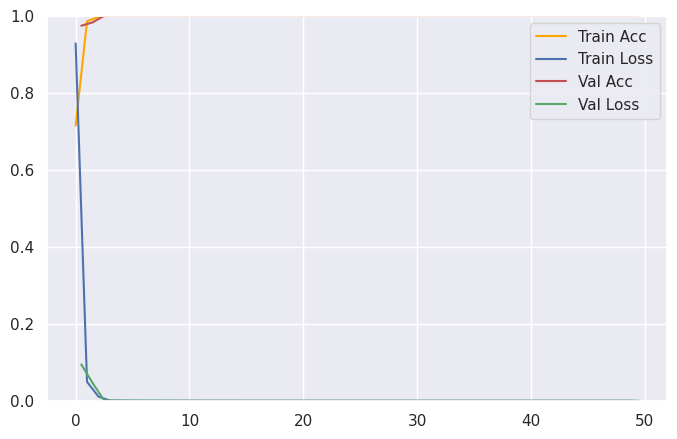

172/172 [==============================] - 0s 2ms/step


<ipython-input-79-39e8a0bde92c>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100


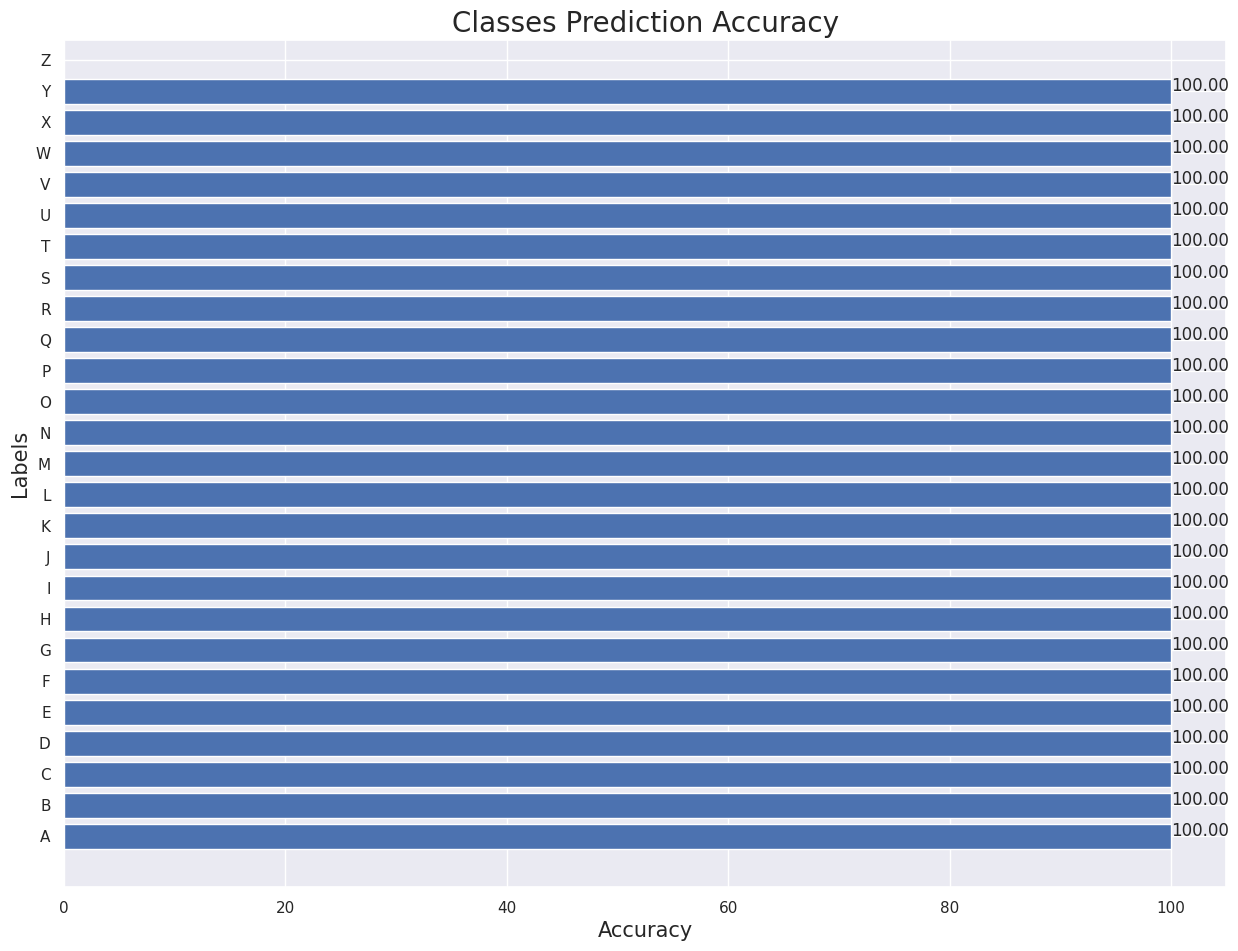

In [ ]:
max_val_accuracy, history, model = do_all(model_cnn_factory(activation, optimizer, learningrate), n_epochs, batch_size)
history_plot(history)
accuracy_plot(model, X_val, y_val)

225/225 [==============================] - 0s 2ms/step


<ipython-input-79-39e8a0bde92c>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100


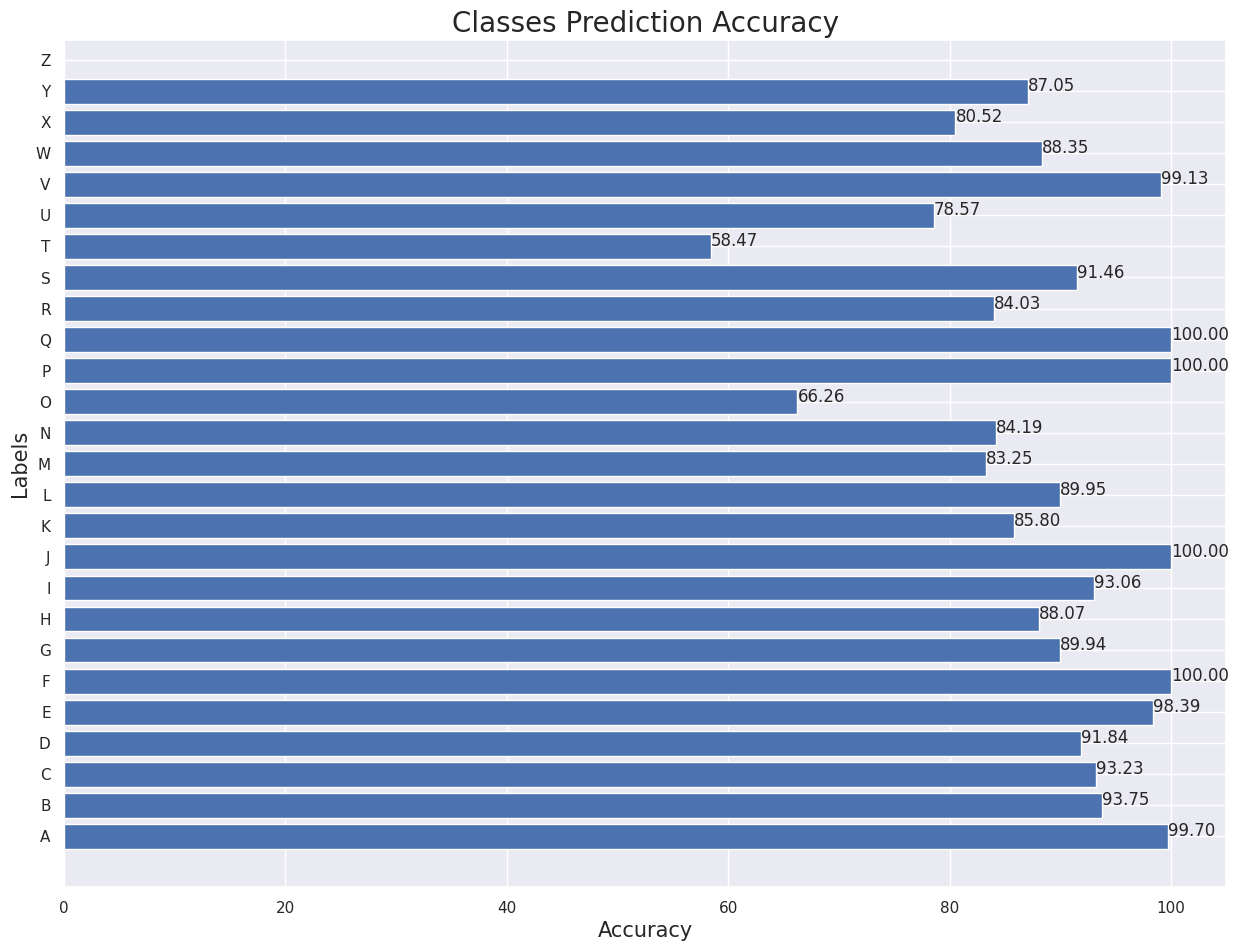

225/225 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.8922


[1.0551761388778687, 0.8922197222709656]

In [ ]:
accuracy_plot(model, X_test, y_test);
model.evaluate(X_test, y_test)

DATA AUGMENTATION

In [ ]:
initial_learning_rate = 1e-4
maximum_learning_rate = 5e-4
rampup_duration = 4
sustain_duration = 1
step_decay_factor = 0.8

# Function to calculate the learning rate
def get_learning_rate(epoch):
    if epoch < rampup_duration:
        learning_rate = (maximum_learning_rate - initial_learning_rate) / rampup_duration * epoch + initial_learning_rate
    elif epoch < rampup_duration + sustain_duration:
        learning_rate = maximum_learning_rate
    else:
        learning_rate = maximum_learning_rate * step_decay_factor ** ((epoch - rampup_duration - sustain_duration) // 2)
    return learning_rate

In [ ]:
def do_all_augment(model, n_epochs, batch_size, further_callbacks=[]):

    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]

    datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1)

        # Applying learning rate scheduler
    lr_sch = LearningRateScheduler(get_learning_rate)
    callbacks.append(lr_sch)

    train = datagen.flow(X_train, y_train, batch_size=batch_size)
    val = datagen.flow(X_val, y_val, batch_size=batch_size)

    history = model.fit(
            train,
            batch_size=batch_size,
            epochs=n_epochs,
            callbacks=callbacks,
            validation_data=val
        )
    max_val_accuracy = np.max(history.history['val_accuracy'])
    return (max_val_accuracy, history, model)

Epoch 1/50
172/172 [==============================] - 8s 39ms/step - loss: 3.1786 - accuracy: 0.0665 - val_loss: 3.1204 - val_accuracy: 0.1178 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 39ms/step - loss: 2.7409 - accuracy: 0.2343 - val_loss: 2.2826 - val_accuracy: 0.3462 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 7s 38ms/step - loss: 1.9736 - accuracy: 0.4126 - val_loss: 1.7478 - val_accuracy: 0.4775 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 1.5158 - accuracy: 0.5469 - val_loss: 1.3821 - val_accuracy: 0.5828 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 40ms/step - loss: 1.2051 - accuracy: 0.6354 - val_loss: 1.1002 - val_accuracy: 0.6560 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 7s 38ms/step - loss: 0.9628 - accuracy: 0.7023 - val_loss: 0.8847 - val_accuracy: 0.7263 - lr: 5.0000e-04
Epoch 7/50
172/172 [====================

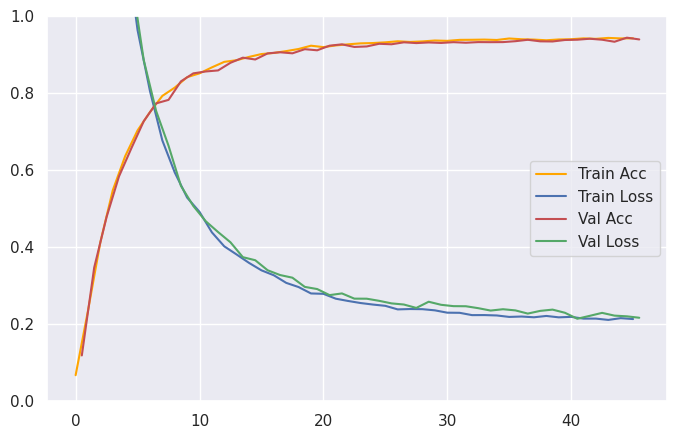

172/172 [==============================] - 0s 2ms/step


<ipython-input-79-39e8a0bde92c>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100


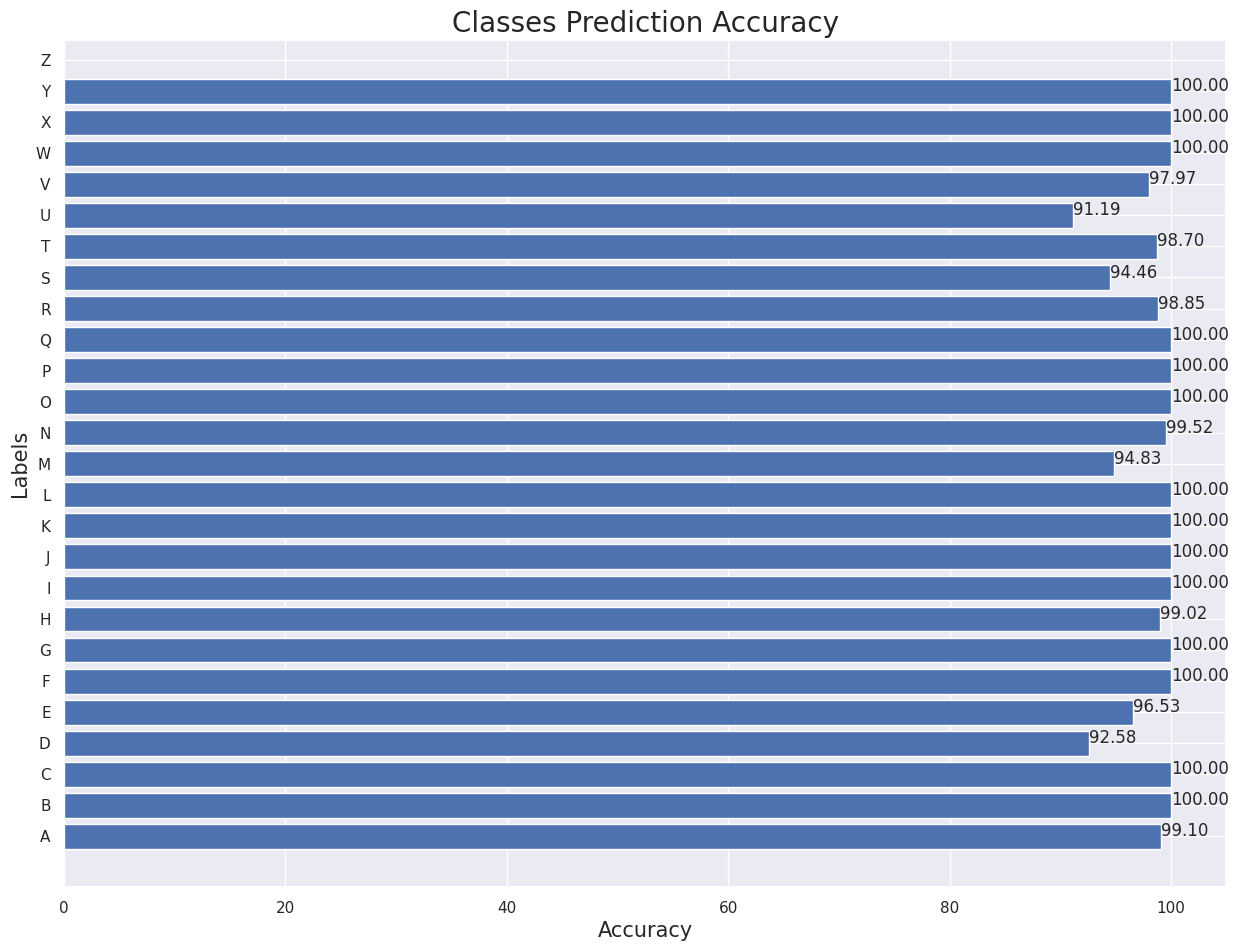

225/225 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9519


[0.18290774524211884, 0.9518962502479553]

In [ ]:
max_val_accuracy, history, model2 = do_all_augment(model_cnn_factory(activation, optimizer, learningrate), n_epochs, batch_size)
history_plot(history)
accuracy_plot(model2, X_val, y_val)
model2.evaluate(X_test, y_test)

**3. INCREASE THE COMPLEXITY**

In [ ]:
activation = "relu"
hiddensizes_cnn = [32, 64, 128]
optimizer = keras.optimizers.Adam
learningrate = 0.001
batch_size = 128
n_epochs = 50

In [ ]:
model = model_cnn_factory(actfn=activation, optimizer=optimizer, learningrate=learningrate)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_22 (Flatten)        (None, 6272)            

**4. TUNING**

In [ ]:
optimizers = [keras.optimizers.SGD,
              keras.optimizers.RMSprop,
              keras.optimizers.Adam]

In [ ]:
def accuracy_bar(accuracy_val):
  metric_val = {
      "accuracy score": {
      "SGD":accuracy_val[0],
      "RMSP":accuracy_val[1],
      "ADAM":accuracy_val[2]}
  }

  ax = pd.DataFrame(metric_val).plot(kind="bar",
                              figsize = (10,7),
                              legend =False,
                              title = "Accuracy Score",
                              color = "y");

  for p in ax.patches:
      ax.annotate(str(round(p.get_height(), 4)), (p.get_x() * 1.005, p.get_height() * 1.005))

Tuning with OPTIMIZER:<class 'keras.src.optimizers.sgd.SGD'> and learning rate 0.1
Epoch 1/50
172/172 [==============================] - 8s 40ms/step - loss: 3.2195 - accuracy: 0.0349 - val_loss: 3.2194 - val_accuracy: 0.0353 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2189 - accuracy: 0.0341 - val_loss: 3.2185 - val_accuracy: 0.0342 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2178 - accuracy: 0.0337 - val_loss: 3.2170 - val_accuracy: 0.0333 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2162 - accuracy: 0.0356 - val_loss: 3.2154 - val_accuracy: 0.0392 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 39ms/step - loss: 3.2144 - accuracy: 0.0437 - val_loss: 3.2135 - val_accuracy: 0.0450 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 6s 37ms/step - loss: 3.2124 - accuracy: 0.0465 - val_loss: 3.21

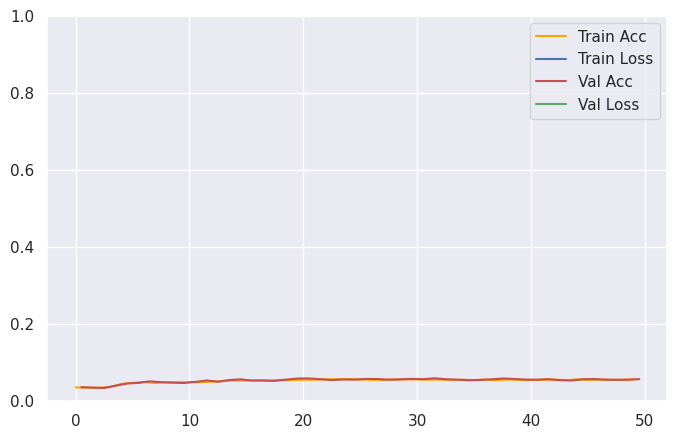

172/172 [==============================] - 1s 3ms/step - loss: 3.1947 - accuracy: 0.0590
Tuning with OPTIMIZER:<class 'keras.src.optimizers.rmsprop.RMSprop'> and learning rate 0.1
Epoch 1/50
172/172 [==============================] - 8s 38ms/step - loss: 3.1371 - accuracy: 0.0879 - val_loss: 3.0236 - val_accuracy: 0.1969 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 6s 38ms/step - loss: 2.6261 - accuracy: 0.2394 - val_loss: 2.2768 - val_accuracy: 0.3236 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 2.0540 - accuracy: 0.3783 - val_loss: 1.7764 - val_accuracy: 0.4689 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 1.5502 - accuracy: 0.5226 - val_loss: 1.2967 - val_accuracy: 0.6039 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 38ms/step - loss: 1.0687 - accuracy: 0.6645 - val_loss: 0.8058 - val_accuracy: 0.7403 - lr: 5.0000e-04
Epoch 6/50
172/172 [

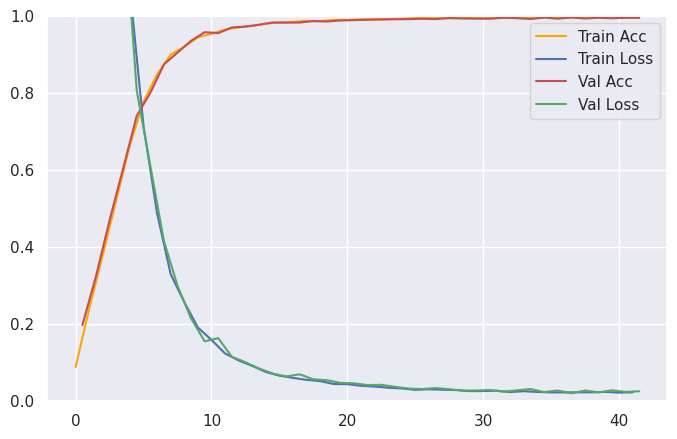

172/172 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Tuning with OPTIMIZER:<class 'keras.src.optimizers.adam.Adam'> and learning rate 0.1
Epoch 1/50
172/172 [==============================] - 8s 39ms/step - loss: 3.0743 - accuracy: 0.1135 - val_loss: 2.7446 - val_accuracy: 0.2320 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 2.0892 - accuracy: 0.3829 - val_loss: 1.6508 - val_accuracy: 0.5134 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 1.2747 - accuracy: 0.6135 - val_loss: 1.0499 - val_accuracy: 0.6675 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 0.8317 - accuracy: 0.7435 - val_loss: 0.6874 - val_accuracy: 0.7736 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 38ms/step - loss: 0.5731 - accuracy: 0.8183 - val_loss: 0.5049 - val_accuracy: 0.8465 - lr: 5.0000e-04
Epoch 6/50
172/172 [======

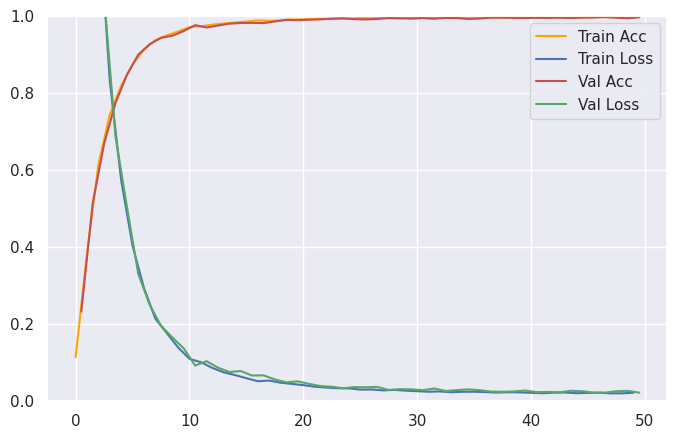

172/172 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9996


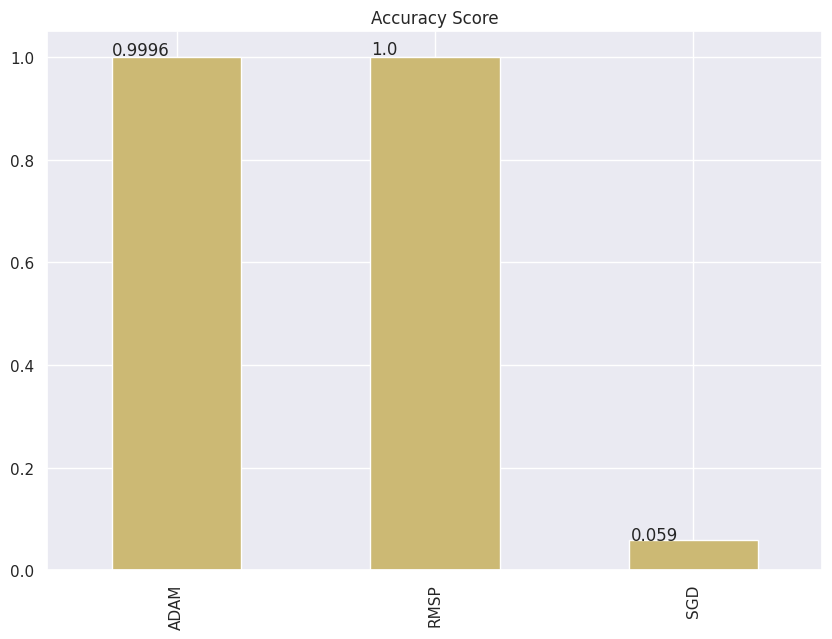

In [ ]:
learning_rate_params = 0.1
accuracy_val = []
for op in optimizers:
    print( f'Tuning with OPTIMIZER:{op} and learning rate {learning_rate_params}')
    val_acc, history, model = do_all_augment(model_cnn_factory(activation, op, learning_rate_params), n_epochs, batch_size)

    history_plot(history)
    score = model.evaluate(X_val, y_val)
    accuracy_val.append(score[1])

accuracy_bar(accuracy_val)

Tuning with OPTIMIZER:<class 'keras.src.optimizers.sgd.SGD'> and learning rate 0.01
Epoch 1/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2177 - accuracy: 0.0368 - val_loss: 3.2183 - val_accuracy: 0.0335 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2170 - accuracy: 0.0366 - val_loss: 3.2173 - val_accuracy: 0.0344 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 3.2158 - accuracy: 0.0366 - val_loss: 3.2159 - val_accuracy: 0.0346 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2141 - accuracy: 0.0362 - val_loss: 3.2143 - val_accuracy: 0.0330 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 38ms/step - loss: 3.2122 - accuracy: 0.0375 - val_loss: 3.2121 - val_accuracy: 0.0348 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2101 - accuracy: 0.0399 - val_loss: 3.2

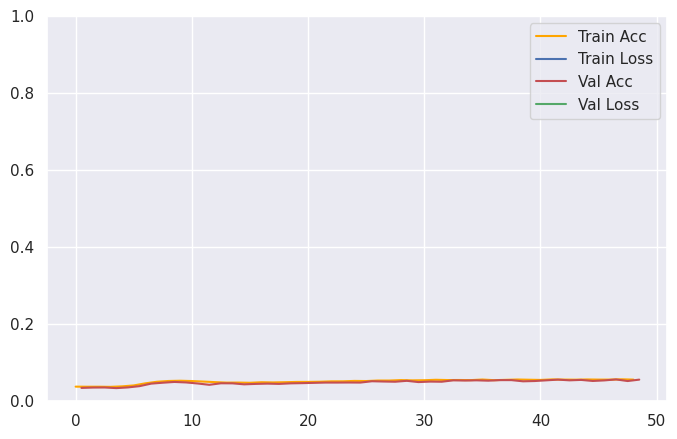

172/172 [==============================] - 0s 2ms/step - loss: 3.1913 - accuracy: 0.0574
Tuning with OPTIMIZER:<class 'keras.src.optimizers.rmsprop.RMSprop'> and learning rate 0.01
Epoch 1/50
172/172 [==============================] - 7s 38ms/step - loss: 3.1333 - accuracy: 0.0882 - val_loss: 3.0172 - val_accuracy: 0.1883 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 2.6267 - accuracy: 0.2357 - val_loss: 2.2843 - val_accuracy: 0.3247 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 2.0434 - accuracy: 0.3834 - val_loss: 1.8320 - val_accuracy: 0.4203 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 6s 37ms/step - loss: 1.4926 - accuracy: 0.5402 - val_loss: 1.2123 - val_accuracy: 0.6349 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 37ms/step - loss: 1.0373 - accuracy: 0.6755 - val_loss: 0.7940 - val_accuracy: 0.7598 - lr: 5.0000e-04
Epoch 6/50
172/172 

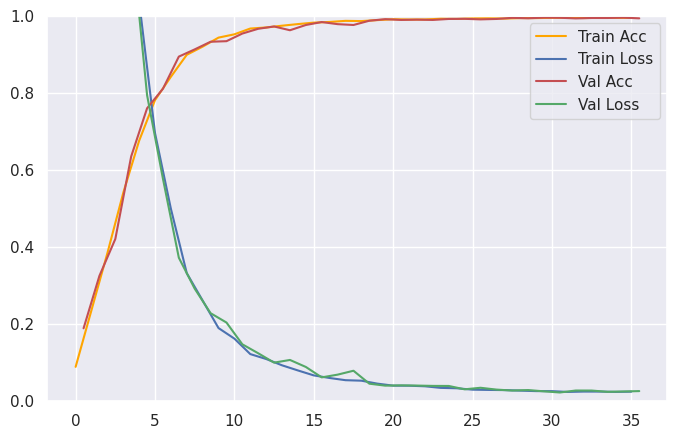

172/172 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9993
Tuning with OPTIMIZER:<class 'keras.src.optimizers.adam.Adam'> and learning rate 0.01
Epoch 1/50
172/172 [==============================] - 8s 39ms/step - loss: 3.0698 - accuracy: 0.1181 - val_loss: 2.7256 - val_accuracy: 0.2615 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 6s 37ms/step - loss: 2.1043 - accuracy: 0.3832 - val_loss: 1.7207 - val_accuracy: 0.4944 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 38ms/step - loss: 1.3714 - accuracy: 0.5856 - val_loss: 1.0988 - val_accuracy: 0.6629 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 6s 37ms/step - loss: 0.8749 - accuracy: 0.7251 - val_loss: 0.7483 - val_accuracy: 0.7616 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 38ms/step - loss: 0.6095 - accuracy: 0.8092 - val_loss: 0.5949 - val_accuracy: 0.8097 - lr: 5.0000e-04
Epoch 6/50
172/172 [=====

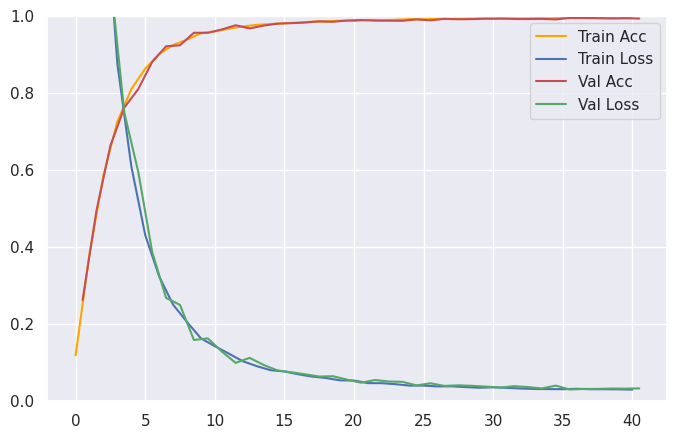

172/172 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9982


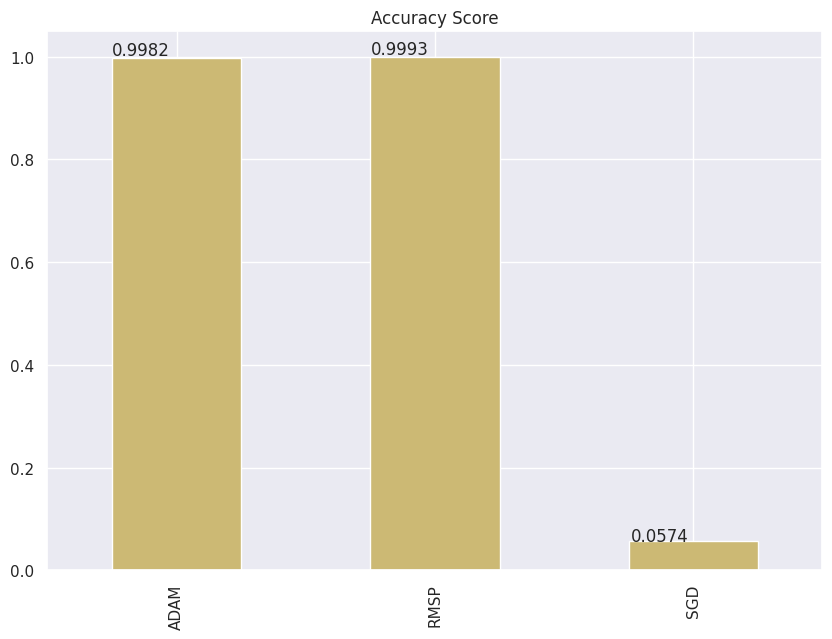

In [ ]:
learning_rate_params = 0.01
accuracy_val = []
for op in optimizers:
    print( f'Tuning with OPTIMIZER:{op} and learning rate {learning_rate_params}')
    val_acc, history, model = do_all_augment(model_cnn_factory(activation, op, learning_rate_params), n_epochs, batch_size)

    history_plot(history)
    score = model.evaluate(X_val, y_val)
    accuracy_val.append(score[1])

accuracy_bar(accuracy_val)

Tuning with OPTIMIZER:<class 'keras.src.optimizers.sgd.SGD'> and learning rate 0.001
Epoch 1/50
172/172 [==============================] - 7s 39ms/step - loss: 3.2197 - accuracy: 0.0457 - val_loss: 3.2202 - val_accuracy: 0.0475 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 6s 37ms/step - loss: 3.2185 - accuracy: 0.0484 - val_loss: 3.2187 - val_accuracy: 0.0474 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 3.2166 - accuracy: 0.0509 - val_loss: 3.2165 - val_accuracy: 0.0504 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 38ms/step - loss: 3.2143 - accuracy: 0.0522 - val_loss: 3.2140 - val_accuracy: 0.0523 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 39ms/step - loss: 3.2114 - accuracy: 0.0509 - val_loss: 3.2107 - val_accuracy: 0.0506 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 6s 37ms/step - loss: 3.2084 - accuracy: 0.0436 - val_loss: 3.

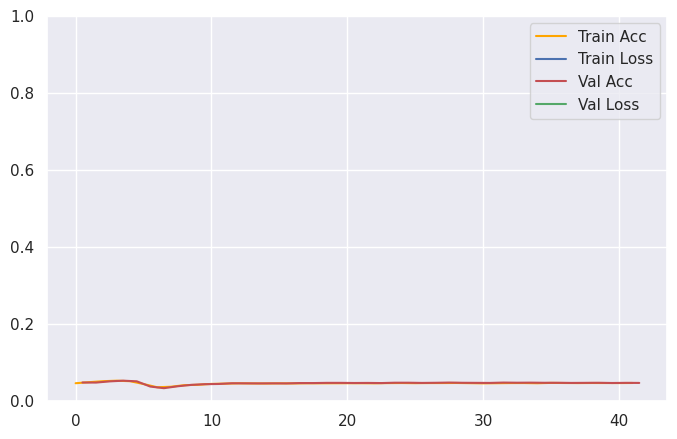

172/172 [==============================] - 0s 2ms/step - loss: 3.1869 - accuracy: 0.0453
Tuning with OPTIMIZER:<class 'keras.src.optimizers.rmsprop.RMSprop'> and learning rate 0.001
Epoch 1/50
172/172 [==============================] - 7s 39ms/step - loss: 3.1522 - accuracy: 0.0765 - val_loss: 3.0707 - val_accuracy: 0.1271 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 6s 37ms/step - loss: 2.6921 - accuracy: 0.2200 - val_loss: 2.3348 - val_accuracy: 0.3049 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 6s 37ms/step - loss: 2.1000 - accuracy: 0.3648 - val_loss: 1.8379 - val_accuracy: 0.4422 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 6s 37ms/step - loss: 1.5955 - accuracy: 0.5068 - val_loss: 1.3067 - val_accuracy: 0.5995 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 38ms/step - loss: 1.1232 - accuracy: 0.6469 - val_loss: 0.9141 - val_accuracy: 0.7055 - lr: 5.0000e-04
Epoch 6/50
172/172

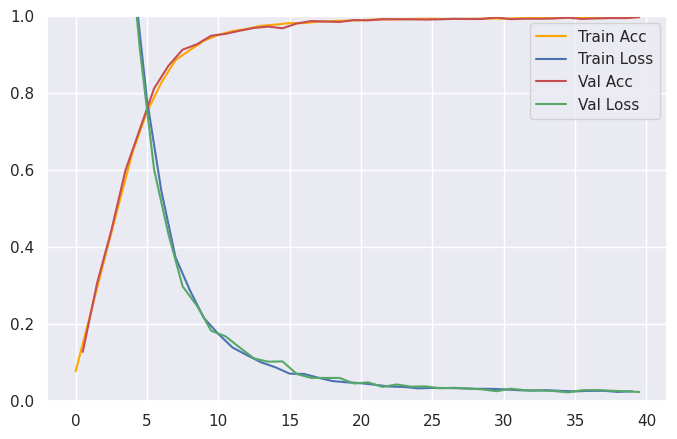

172/172 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Tuning with OPTIMIZER:<class 'keras.src.optimizers.adam.Adam'> and learning rate 0.001
Epoch 1/50
172/172 [==============================] - 8s 38ms/step - loss: 3.0482 - accuracy: 0.1302 - val_loss: 2.6500 - val_accuracy: 0.2785 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 6s 38ms/step - loss: 1.9529 - accuracy: 0.4262 - val_loss: 1.5537 - val_accuracy: 0.5351 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 7s 38ms/step - loss: 1.2234 - accuracy: 0.6297 - val_loss: 0.9881 - val_accuracy: 0.7006 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 39ms/step - loss: 0.8137 - accuracy: 0.7471 - val_loss: 0.6686 - val_accuracy: 0.7962 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 37ms/step - loss: 0.5724 - accuracy: 0.8205 - val_loss: 0.4847 - val_accuracy: 0.8570 - lr: 5.0000e-04
Epoch 6/50
172/172 [====

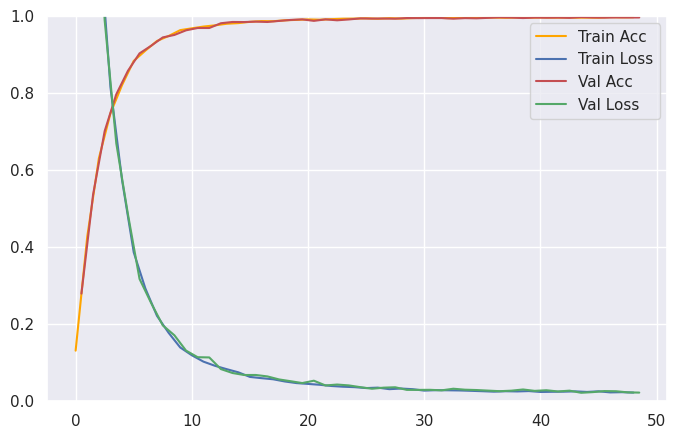

172/172 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9998


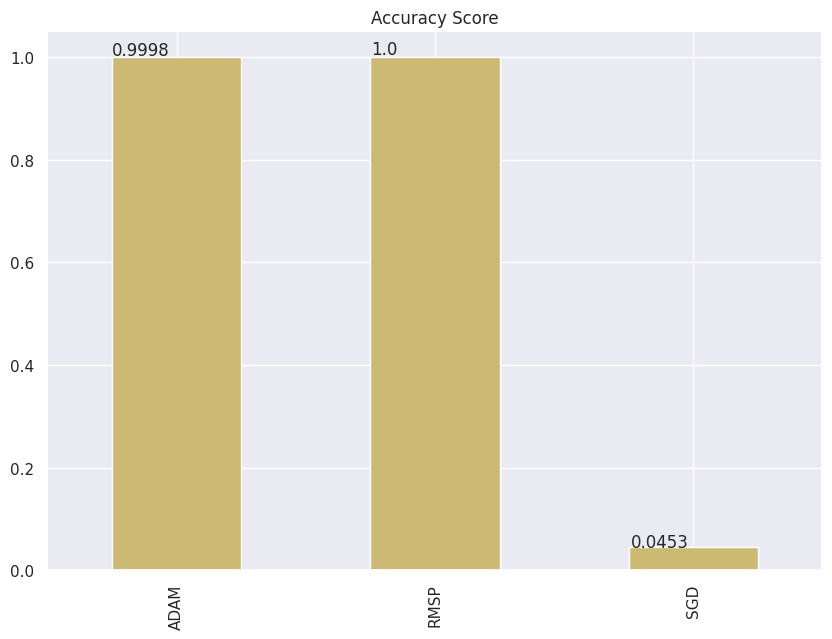

In [ ]:
learning_rate_params = 0.001
accuracy_val = []
for op in optimizers:
    print( f'Tuning with OPTIMIZER:{op} and learning rate {learning_rate_params}')
    val_acc, history, model = do_all_augment(model_cnn_factory(activation, op, learning_rate_params), n_epochs, batch_size)

    history_plot(history)
    score = model.evaluate(X_val, y_val)
    accuracy_val.append(score[1])

accuracy_bar(accuracy_val)

**4. Comparison of models, selection of the best two and reporting of final results**

Epoch 1/50
172/172 [==============================] - 8s 39ms/step - loss: 3.0337 - accuracy: 0.1406 - val_loss: 2.6336 - val_accuracy: 0.2479 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 2.0084 - accuracy: 0.4103 - val_loss: 1.6064 - val_accuracy: 0.5232 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 7s 39ms/step - loss: 1.2721 - accuracy: 0.6161 - val_loss: 1.0115 - val_accuracy: 0.6811 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 7s 39ms/step - loss: 0.8360 - accuracy: 0.7385 - val_loss: 0.6648 - val_accuracy: 0.7871 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 7s 39ms/step - loss: 0.5680 - accuracy: 0.8198 - val_loss: 0.4641 - val_accuracy: 0.8596 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 7s 38ms/step - loss: 0.3820 - accuracy: 0.8837 - val_loss: 0.2987 - val_accuracy: 0.9166 - lr: 5.0000e-04
Epoch 7/50
172/172 [====================

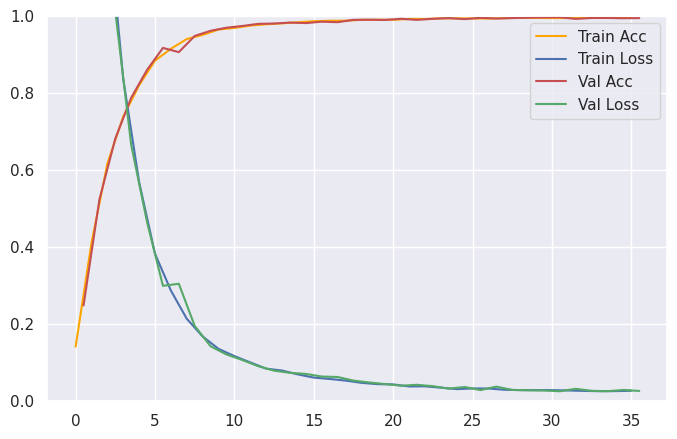

225/225 [==============================] - 0s 2ms/step


<ipython-input-79-39e8a0bde92c>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100


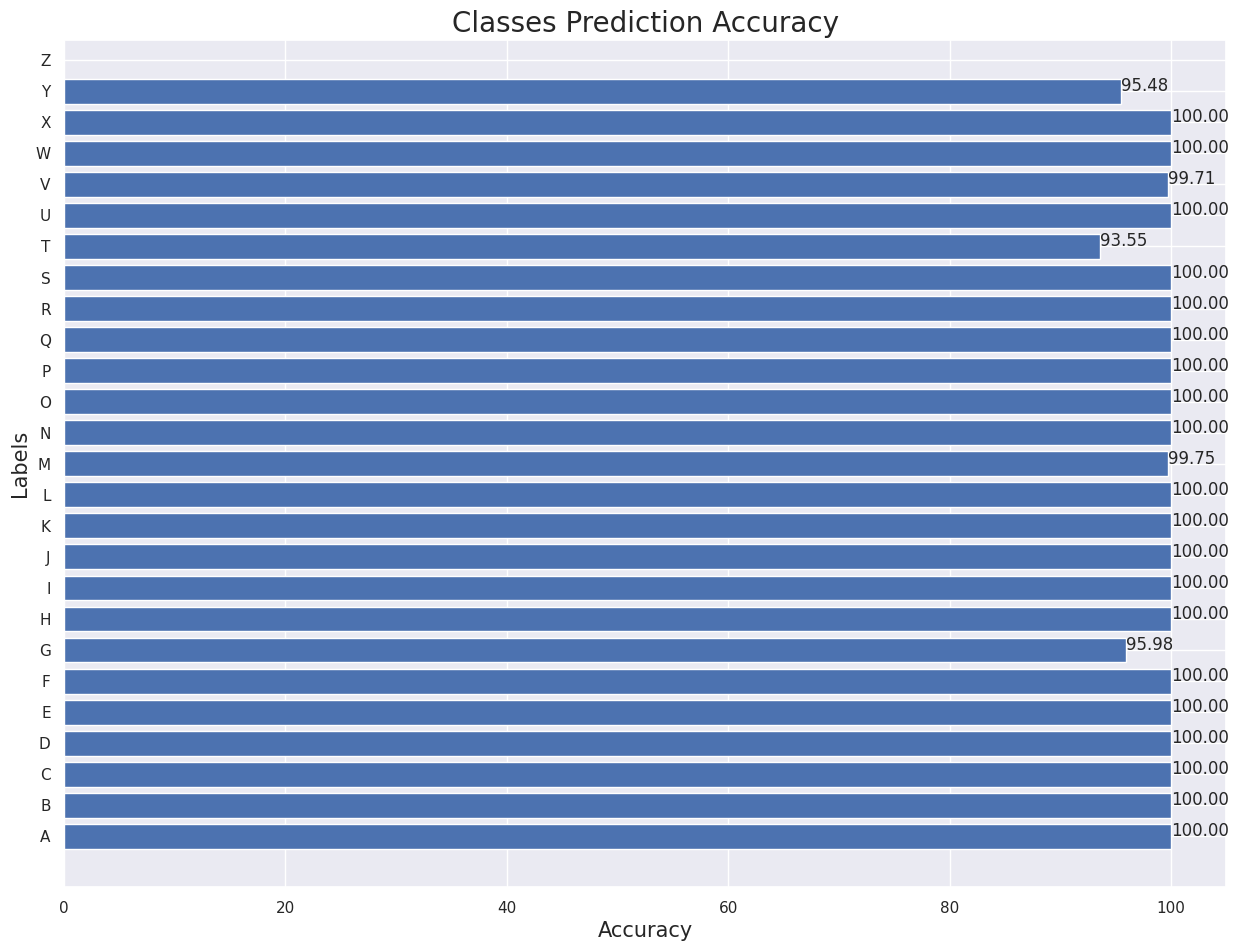

225/225 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9934


[0.02358183078467846, 0.9934467077255249]

In [ ]:
# model 1

optimizer = keras.optimizers.Adam
learningrate = 0.001

_, history, model_final_cnn1 = do_all_augment(model_cnn_factory(activation, optimizer, learningrate), n_epochs, batch_size)
history_plot(history)
accuracy_plot(model_final_cnn1, X_test, y_test)
model_final_cnn1.evaluate(X_test, y_test)

Epoch 1/50
172/172 [==============================] - 7s 39ms/step - loss: 3.1339 - accuracy: 0.0847 - val_loss: 3.0189 - val_accuracy: 0.1772 - lr: 1.0000e-04
Epoch 2/50
172/172 [==============================] - 7s 38ms/step - loss: 2.6279 - accuracy: 0.2366 - val_loss: 2.3169 - val_accuracy: 0.2970 - lr: 2.0000e-04
Epoch 3/50
172/172 [==============================] - 7s 39ms/step - loss: 2.0638 - accuracy: 0.3726 - val_loss: 1.8196 - val_accuracy: 0.4429 - lr: 3.0000e-04
Epoch 4/50
172/172 [==============================] - 6s 38ms/step - loss: 1.5877 - accuracy: 0.5148 - val_loss: 1.3521 - val_accuracy: 0.5899 - lr: 4.0000e-04
Epoch 5/50
172/172 [==============================] - 6s 37ms/step - loss: 1.0964 - accuracy: 0.6575 - val_loss: 0.8342 - val_accuracy: 0.7463 - lr: 5.0000e-04
Epoch 6/50
172/172 [==============================] - 7s 38ms/step - loss: 0.7242 - accuracy: 0.7737 - val_loss: 0.6010 - val_accuracy: 0.8128 - lr: 5.0000e-04
Epoch 7/50
172/172 [====================

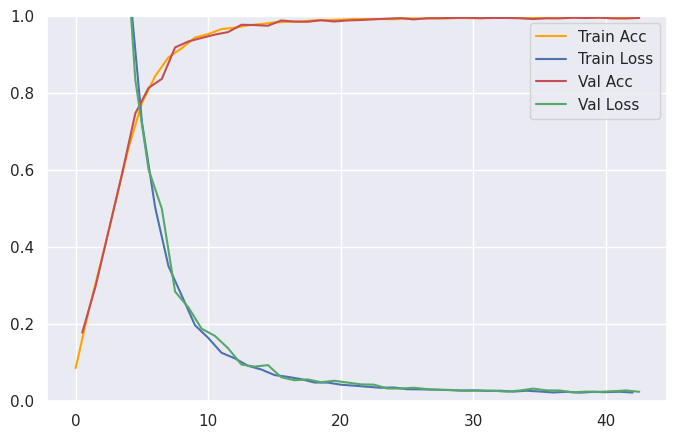

225/225 [==============================] - 0s 2ms/step


<ipython-input-79-39e8a0bde92c>:8: RuntimeWarning: invalid value encountered in divide
  class_accuracies = (class_correct_counts / np.bincount(y, minlength=26)) * 100


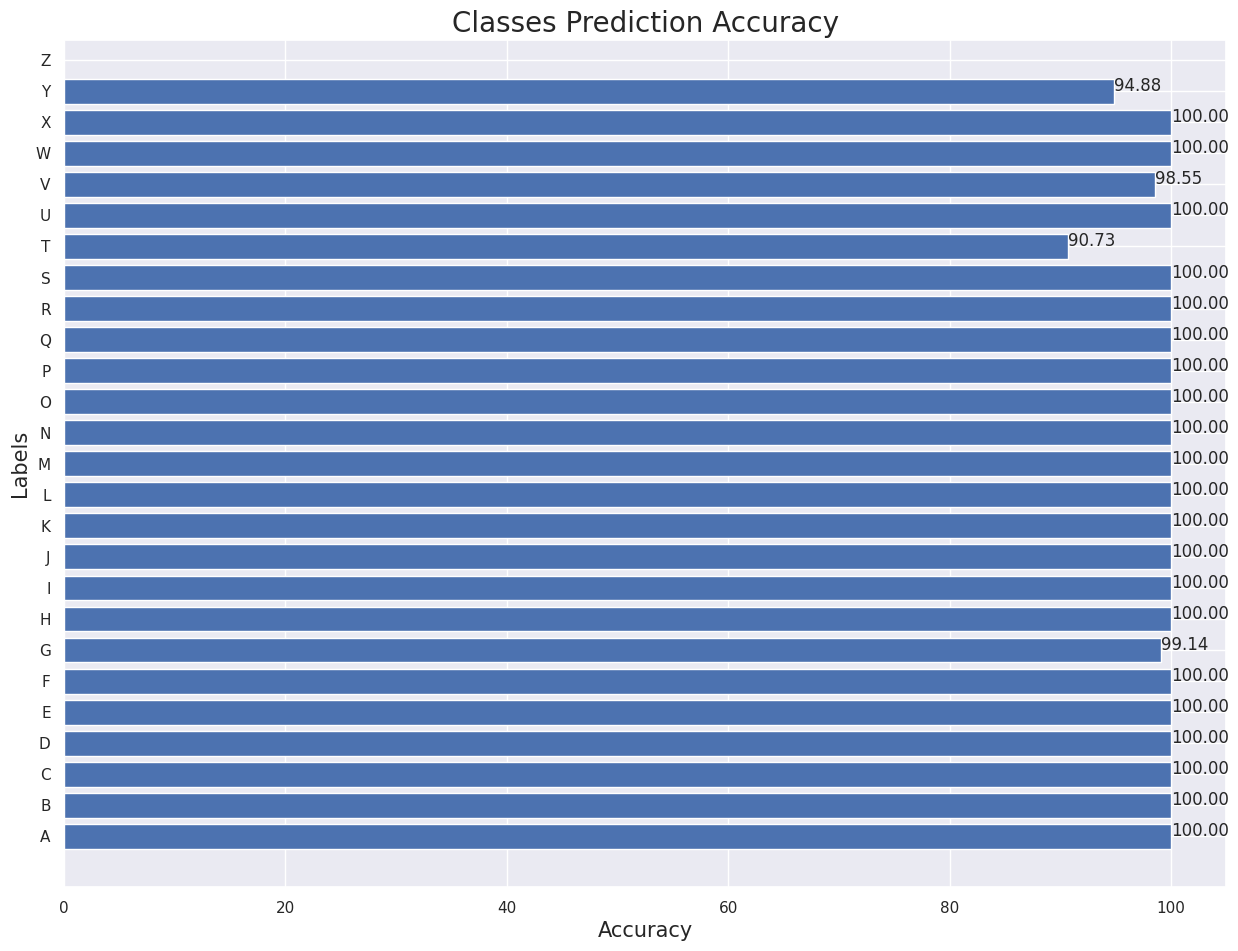

225/225 [==============================] - 1s 2ms/step - loss: 0.0265 - accuracy: 0.9933


[0.02651027962565422, 0.9933072924613953]

In [ ]:
# model 2

optimizer = keras.optimizers.RMSprop
learningrate = 0.001

_, history, model_final_cnn2 = do_all_augment(model_cnn_factory(activation, optimizer, learningrate), n_epochs, batch_size)
history_plot(history)
accuracy_plot(model_final_cnn2, X_test, y_test)
model_final_cnn2.evaluate(X_test, y_test)